In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 : Data Collection

In [3]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\Employees Retention Analysis\HR_comma_sep (1).csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Step 2: Data Cleaning & Exploration

In [5]:
#checking the shape of the dataset
data.shape

(14999, 10)

In [6]:
#checking the datatypes and missing values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
#checking the basic statistics for numerical columns
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
#checking for missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
# Check column names
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
# Unique values in each column 
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

satisfaction_level: [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation: [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project: [2 5 7 6 4 3]
average_montly_hours: [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134

### Step 3: Exploratory Data Analysis (EDA) + Visualizations

#### Satisfaction Level vs Attrition

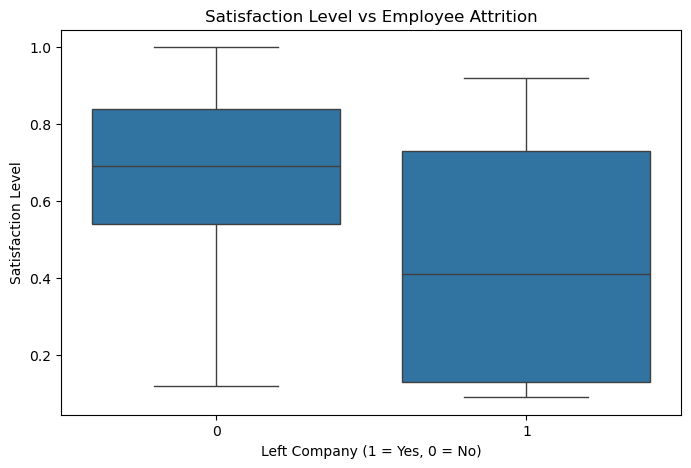

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='satisfaction_level', data=data)
plt.title("Satisfaction Level vs Employee Attrition")
plt.xlabel("Left Company (1 = Yes, 0 = No)")
plt.ylabel("Satisfaction Level")
plt.show()

##### Insights
###### Employees who left the company had a significantly lower median satisfaction level compared to those who stayed.
###### Low job satisfaction is a strong factor contributing to employee attrition.

#### Average Monthly Hours vs Attrition

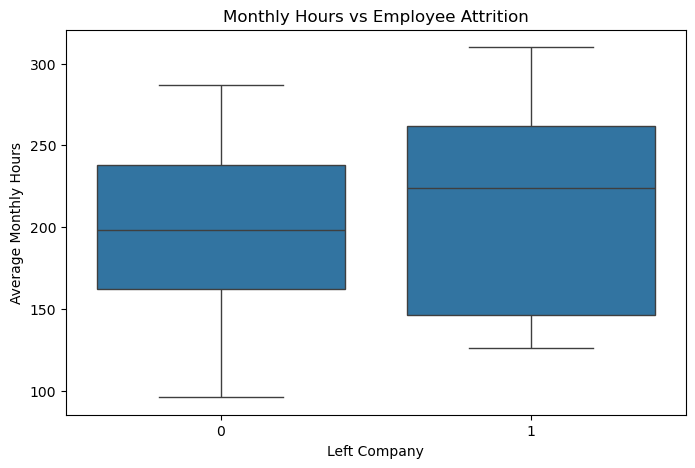

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='average_montly_hours', data=data)
plt.title("Monthly Hours vs Employee Attrition")
plt.xlabel("Left Company")
plt.ylabel("Average Monthly Hours")
plt.show()

##### Insights
###### Employees with very high or very low monthly hours are more likely to leave.
###### Those working balanced hours (around 150–200 hours) tend to stay.
###### This suggests that both overwork and lack of work may be reasons for attrition.

#### Department-wise Attrition

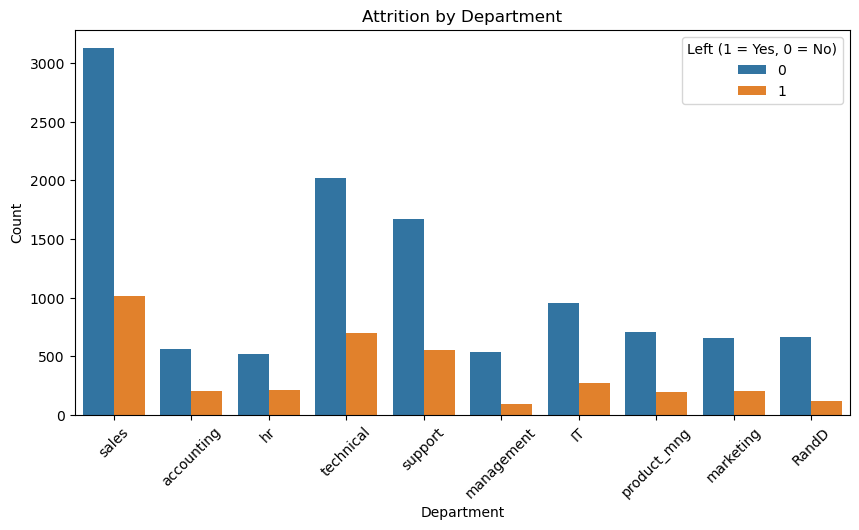

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department', hue='left', data=data)
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Left (1 = Yes, 0 = No)")
plt.show()

##### Insights
###### Sales, Technical, and Support departments have the highest attrition.
###### Management and R&D show low attrition despite moderate employee counts.

#### Salary Level vs Attrition

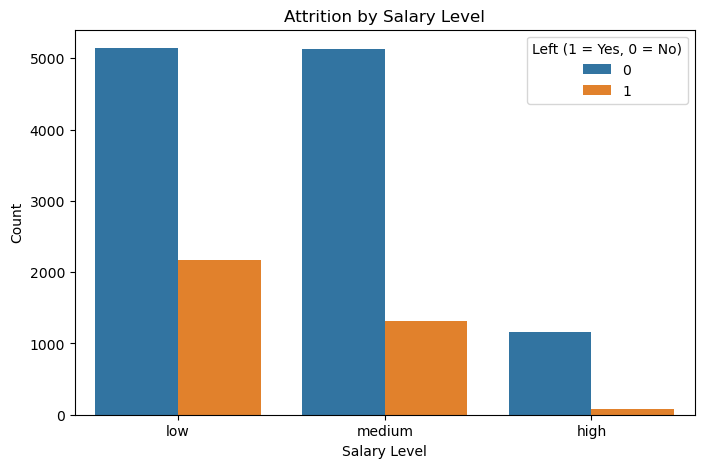

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='salary', hue='left', data=data, order=['low', 'medium', 'high'])
plt.title("Attrition by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left (1 = Yes, 0 = No)")
plt.show()

##### Insights
###### Low and Medium salary employees are more likely to leave.
###### High salary employees rarely leave, suggesting a strong correlation between compensation and retention.

#### Promotion in Last 5 Years vs Attrition 

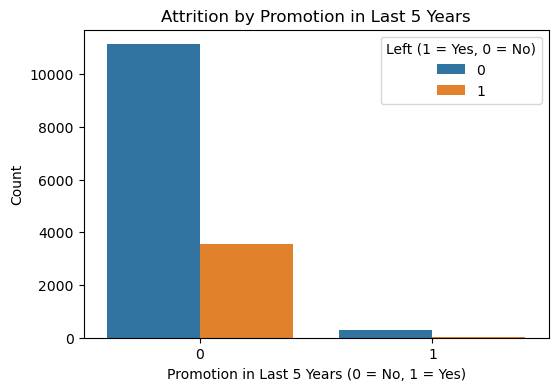

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='promotion_last_5years', hue='left', data=data)
plt.title("Attrition by Promotion in Last 5 Years")
plt.xlabel("Promotion in Last 5 Years (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Left (1 = Yes, 0 = No)")
plt.show()

##### Insights
###### Most employees who were not promoted had a much higher chance of leaving.
###### Employees who received promotions haven't left, even if they were a small group.

#### Time Spent at Company vs Attrition

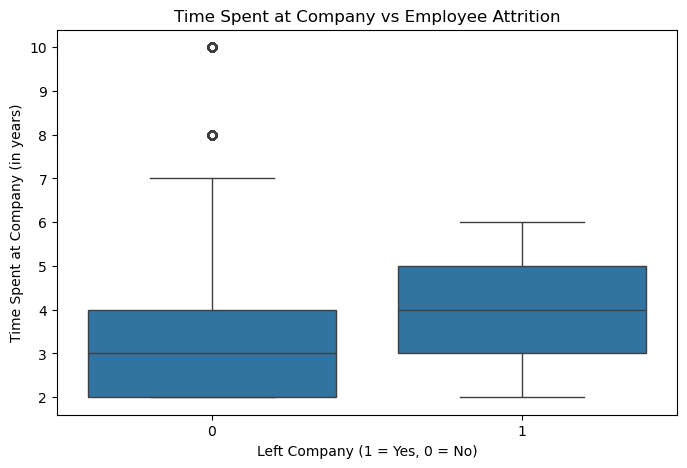

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='left', y='time_spend_company', data=data)
plt.title("Time Spent at Company vs Employee Attrition")
plt.xlabel("Left Company (1 = Yes, 0 = No)")
plt.ylabel("Time Spent at Company (in years)")
plt.show()

##### Insights
###### Most employees who left the company had spent around 3–5 years in the organization, indicating attrition is more likely during mid-level tenure.
###### Employees who stayed longer (6–10 years) were less likely to leave, suggesting that longer tenure correlates with higher retention.

### Build Logistic Regression Model

In [42]:
x = data[['satisfaction_level','average_montly_hours','salary','promotion_last_5years','time_spend_company']]
x.head()

,satisfaction_level,average_montly_hours,salary,promotion_last_5years,time_spend_company
0,0.38,157,low,0,3
1,0.80,262,medium,0,6
2,0.11,272,medium,0,4
3,0.72,223,low,0,5
4,0.37,159,low,0,3


In [44]:
dummies = pd.get_dummies(data['salary'])
dummies.head()

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [46]:
merged = pd.concat([x,dummies],axis='columns')
merged.head()

,satisfaction_level,average_montly_hours,salary,promotion_last_5years,time_spend_company,high,low,medium
0,0.38,157,low,0,3,False,True,False
1,0.80,262,medium,0,6,False,False,True
2,0.11,272,medium,0,4,False,False,True
3,0.72,223,low,0,5,False,True,False
4,0.37,159,low,0,3,False,True,False


In [48]:
inputs = merged.drop(['high','salary'],axis='columns')
inputs.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,low,medium
0,0.38,157,0,3,True,False
1,0.80,262,0,6,False,True
2,0.11,272,0,4,False,True
3,0.72,223,0,5,True,False
4,0.37,159,0,3,True,False


In [50]:
target = data['left']

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [105]:
model.score(x_test,y_test)

0.78

### Interpret Model Results

In [108]:
y_predicted = model.predict(x_test)

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[2142,  150],
       [ 510,  198]], dtype=int64)

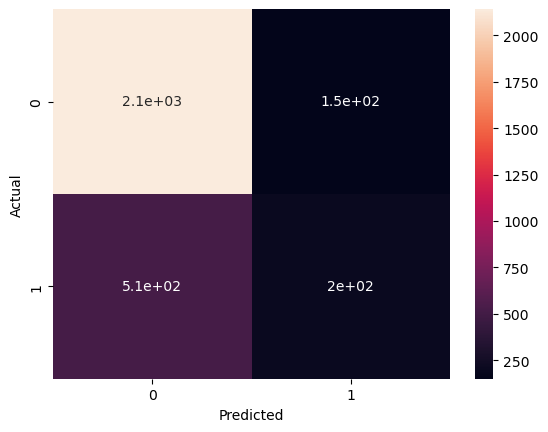

In [112]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Interpretation
###### True Negatives (2142): 2,142 employees who did not leave the company were correctly predicted as staying.
###### False Positives (150): 150 employees who did not leave were incorrectly predicted as having left.
###### False Negatives (510): 510 employees who left were incorrectly predicted as staying.
###### True Positives (198): 198 employees who left were correctly predicted as leaving.

##### Accuracy = [(TP+TN) / (TP+TN+FP+FN)] * 100 = 78.00%
###### The model correctly predicted 78% of the employee attrition outcomes.

#####  Precision (Positive Predictive Value) = TP / (TP+FP) = 56.90%
###### Out of all the employees predicted to leave, 56.9% actually left. This shows the model's reliability when predicting attrition.

##### Recall (Sensitivity / True Positive Rate) =TP / (TP+FN) = 28.00%
###### The model successfully identified only 28% of the employees who actually left the company — indicating many are missed (false negatives are high).

#####  F1 Score (Harmonic Mean of Precision and Recall) = [2 * (precision * recall)] / (precision + recall) = 37.40%
###### This score balances precision and recall. The model’s F1 score is moderate, reflecting its average performance on predicting actual leavers.

### Saving the model

In [124]:
### Saving the model using pickle
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)